# Neural Network for Leafs

## Preliminaries

In [1]:
# Import packages
import sys
import os
print('Current working directory:', os.getcwd())
# If academia_ai is not installed, include its path here (you might have to enter your custom path here)
#path_to_academia_ai = os.path.join(os.pardir, os.pardir)
path_to_academia_ai = 'C:\\Users\\sophi\\Dropbox\\academia_2016'
if path_to_academia_ai not in sys.path:
    sys.path.append(path_to_academia_ai)
import numpy as np
from timeit import default_timer as timer
# Can use inline instead of notebook or remove this magic and use
# plt.show() to get plots in seperate windows
%matplotlib notebook 
import matplotlib.pyplot as plt
import academia_AI as ai

Current working directory: C:\Users\sophi\Dropbox\academia_2016\academia_AI\examples


In [2]:
# Load leafs from disk and do some preprocessing
l_train = [] # training set
l_test = [] # testing set
for n in range (7):
    matrices = np.load(os.path.join(os.pardir, 'leafs', 'data', str(n)+'.npy'))
    
    for i in range(799): # 2x799 for training
        l_train += [ai.leafs.Leaf(i+n*1000, n, matrices[i]/255)] # Leaf(iid,label,matrix,labelstr) *labelstr deleted ..too difficult
        
    for i in range(799,899): # 2x100 for testing
        l_test += [ai.leafs.Leaf(i+n*1000, n, matrices[i]/255)]
        
np.random.shuffle(l_train)
np.random.shuffle(l_test)
#plt.figure()
#plt.imshow(l_train[0].image, cmap='Greys') # show one 

# -------- Normalize data: --------------
def normalize(dataset):
    # calculate the mean
    mean=np.zeros(dataset[0].image.shape)
    for lea in dataset:
        mean=mean+lea.image
    mean/=len(dataset)
    #calculating the variance
    var=np.zeros(dataset[0].image.shape)
    for lea in dataset:
        var=var+(lea.image-mean)**2
    var/=len(dataset)
    f=0.1
    var=(var-f>=0)*(var-f)+f  # caps the minimal 
    for lea in dataset:
        lea.image=(lea.image-mean)/var

normalize(l_train)
normalize(l_test)
#plt.figure()

def desired_output(label):
    res = -1 * np.ones((7,1,1))
    res[label, 0, 0] = +1
    return res
    
#plt.imshow(l_train[0].image, cmap='Greys')
training_images = [np.array(leaf.image) for leaf in l_train]
training_solutions = [desired_output(leaf.label) for leaf in l_train]
test_images = [np.array(leaf.image) for leaf in l_test]
test_solutions = [desired_output(leaf.label) for leaf in l_test]

## Create layers and build neural network

In [19]:
ai.ReLuLayer?

In [24]:
cl = ai.ConvolutionLayer(nr_filters=9, filter_shape=(9,9), stride=1)
cl2 = ai.ConvolutionLayer(nr_filters=9, filter_shape=(9,9), stride=1)
th = ai.HyperbolicTangentLayer()
sig= ai.SigmoidLayer(learning=False)
relu=ai.ReLuLayer()
full = ai.FullyConnectedLayer(input_shape=(81,40,40), output_shape=(7,1,1))
net = ai.ConvolutionalNeuralNet() 
net.add_layer(cl)  
net.add_layer(relu)
net.add_layer(cl2)
net.add_layer(full)

<IPython.core.display.Javascript object>


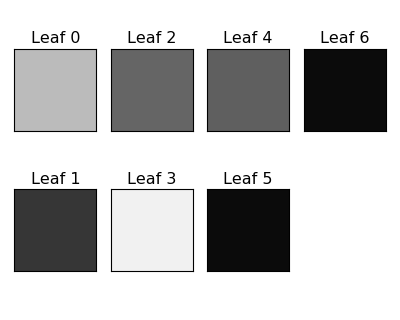

Classified label: 5
Correct label: 6


In [25]:
index = 0

leaf_ex = training_images[index]
sol_ex = training_solutions[index]
result = net.forward_prop(leaf_ex)
# Plot the result after propagating through the net
fig, axarr = plt.subplots(2, 4, figsize=(5,4))
for x in range(2):
    for y in range(4):
        if x+2*y == 7:
            plt.delaxes(axarr[x, y])
            continue
        axarr[x, y].imshow(result[x+2*y], cmap='Greys', vmin=-1, vmax=1)
        axarr[x, y].set_title('Leaf '+str(x+2*y))
        axarr[x, y].get_xaxis().set_visible(False)
        axarr[x, y].get_yaxis().set_visible(False)
plt.tight_layout()
print('Classified label:', np.argmax(result))
print('Correct label:', np.argmax(sol_ex))

<IPython.core.display.Javascript object>


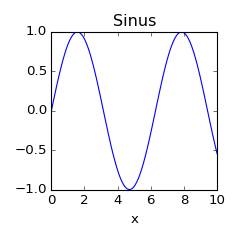

In [15]:
x=np.linspace(0,10,100)
plt.figure(figsize=(3,3))
plt.plot(x,np.sin(x))
plt.xlabel('x')
plt.title('Sinus')
plt.tight_layout()

<IPython.core.display.Javascript object>


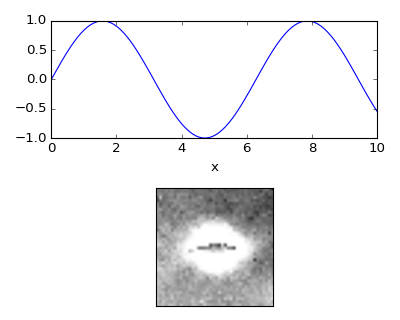

In [34]:
x=np.linspace(0,10,100)
fig, axarr = plt.subplots(2, 1, figsize=(5,4))
axarr[0].plot(x,np.sin(x))
axarr[1].imshow(training_images[0],cmap='Greys',vmin=-1, vmax=1)
axarr[1].get_xaxis().set_visible(False)
axarr[1].get_yaxis().set_visible(False)
axarr[0].set_xlabel('x')

plt.tight_layout()

<IPython.core.display.Javascript object>


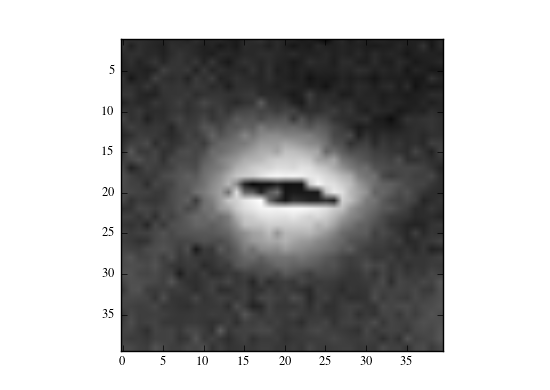

In [106]:
plt.figure()
plt.imshow(training_images[0], cmap='Greys')

In [62]:
## ADAPT images and solutions to be numpy and desired shape!

In [38]:
learning_rate = 1e-5
start = timer()
net.train(training_images, training_solutions, learning_rate, iterations=1)
end = timer()
print('Training took', end-start, 'seconds.') # (usually around 140 seconds for one iteration)

Training took 471.98932504125423 seconds.


In [29]:
# Same here...

In [39]:
net.test_net(test_images, test_solutions)

0.8642857142857143

In [37]:
#net.save('data/leaf_network-SE-PK.pkl')

Saved net in file: data/leaf_network-SE-PK.pkl
